In [4]:
import copy
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("./Datasets/Iris.csv")

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df = df.drop(columns=["Id"])
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.describe(include=['O'])

,Species
count,150
unique,3
top,Iris-setosa
freq,50


In [9]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
"""
Zscore normalization: (xi - mu) / sigma.
"""
def scale(xi, mu, sigma):
    return (xi-mu)/sigma

def normalize(nparr):
    mu = nparr.mean(axis=0)
    sigma = nparr.std(axis=0)
    return mu, sigma, (nparr-mu)/sigma

In [11]:
X = df.drop(columns=["Species"])
mu, sigma, X_norm = normalize(X)
Y = df["Species"]

In [12]:
X = df.drop(columns=["Species"])
Y = df["Species"]
mu, sigma, X_norm = normalize(X)

In [13]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


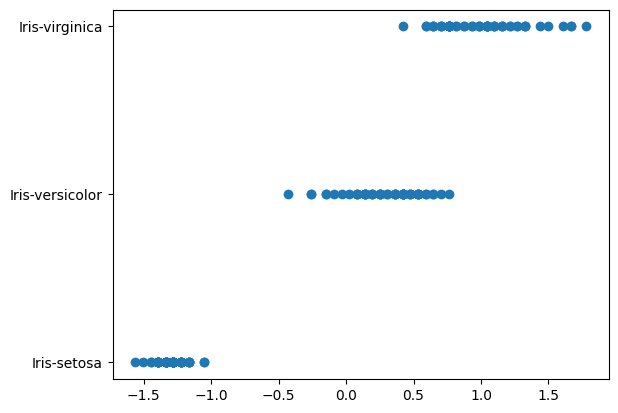

In [14]:
plt.scatter(X_norm["PetalLengthCm"], Y)

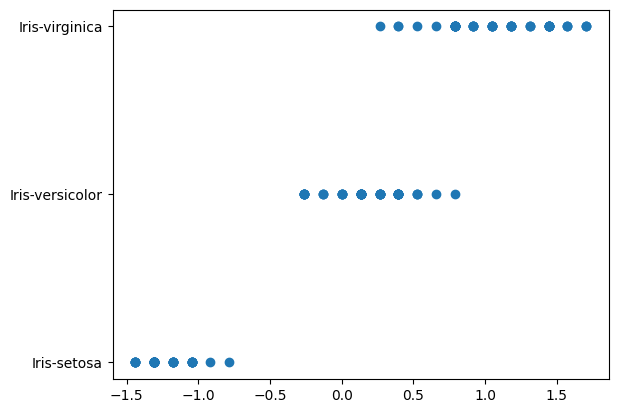

In [15]:
plt.scatter(X_norm["PetalWidthCm"], Y)

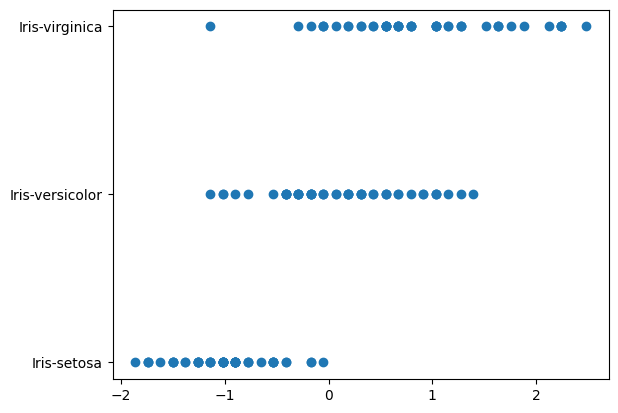

In [16]:
plt.scatter(X_norm["SepalLengthCm"], Y)

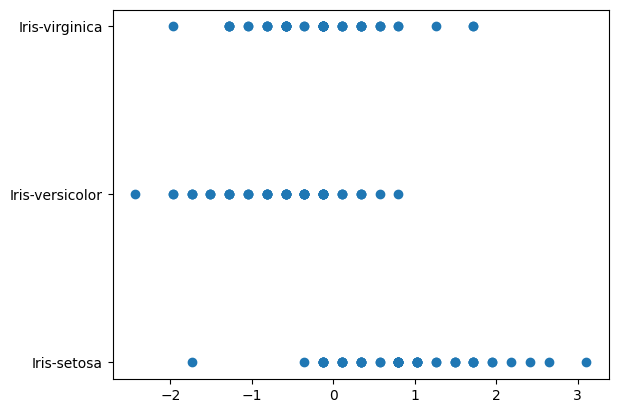

In [17]:
plt.scatter(X_norm["SepalWidthCm"], Y)

In [18]:
"""f(w, b, x) = dot(w, x) + b"""
def f(w, b, x):
    fx = np.dot(w, x) + b
    return 1 / (1 + math.exp(-fx))

"""Squared Error Cost Function"""
def j(w, b, X, Y):
    cost = 0
    n =  X.shape[0]
    for i in range(n):
        cost += -Y[i]*math.log(f(w, b, X[i])) - (1-Y[i])*math.log(1-f(w, b, X[i]))
    return cost/n

In [19]:
"""Gradient Calculator"""
def gradient(w, b, X, Y):
    n, m = X.shape
    dj_dw, dj_db = np.zeros(m), 0
    for i in range(n):
        err = f(w, b, X[i]) - Y[i]
        for j in range(m):
            dj_dw[j] += err*X[i, j]
        dj_db += err
    
    dj_dw /= n
    dj_db /= n

    return dj_dw, dj_db

"Gradient Descent Algorithm"
def gradient_descent(a, X, Y, epsilon=1e-3, maxiter=1000):
    n, m = X.shape

    w, b = np.zeros(m), 0
    prev_cost = j(w, b, X, Y)
    cost_hist = [prev_cost, ]
    format = '{:10} {:10}'
    print   (format.format("Iteration", "Cost"))
    for i in range(maxiter):
        dj_dw, dj_db = gradient(w, b, X, Y)

        w -= a*dj_dw
        b -= a*dj_db

        cost = j(w, b, X, Y)

        if (i % 1000 == 0):
            print(format.format(i, cost))
            cost_hist.append(cost)

        if ((prev_cost - cost) < epsilon):
            break
        prev_cost = cost


    return (w, b), cost_hist

In [20]:
Z = copy.copy(Y)
Y = Y.replace("Iris-setosa", 1)
Y = Y.replace("Iris-virginica", 0)
Y = Y.replace("Iris-versicolor", 0)
Y

/tmp/ipykernel_26840/1608429586.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y = Y.replace("Iris-versicolor", 0)


0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    0
147    0
148    0
149    0
Name: Species, Length: 150, dtype: int64

In [21]:
X = X.to_numpy()
Y = Y.to_numpy()

In [22]:
(w, b), cost_hist = gradient_descent(1e-2, X, Y, epsilon=1e-9, maxiter=100000)

print(f"{w = }")
print(f"{b = }")

Iteration  Cost      
         0 0.6564300892794769
      1000 0.058410643815034406
      2000 0.03137021435678912
      3000 0.021757017357089885
      4000 0.016779478410980493
      5000 0.013718084490484606
      6000 0.011637144524131064
      7000 0.010126689835490407
      8000 0.00897817137738183
      9000 0.00807406392780706
     10000 0.007342984496851271
     11000 0.006739016881204892
     12000 0.0062312549898783575
     13000 0.005798115525838869
     14000 0.005424058814406837
     15000 0.005097605256023452
     16000 0.004810086359818185
     17000 0.004554831025206942
     18000 0.0043266195928980365
     19000 0.004121308067798344
     20000 0.003935563598272335
     21000 0.003766674532351059
     22000 0.003612411584465414
     23000 0.003470924731191954
     24000 0.0033406655326052195
     25000 0.003220327841070901
     26000 0.0031088020037974523
     27000 0.003005139101195136
     28000 0.0029085227412924903
     29000 0.0028182466077046673
     30000 0.0027

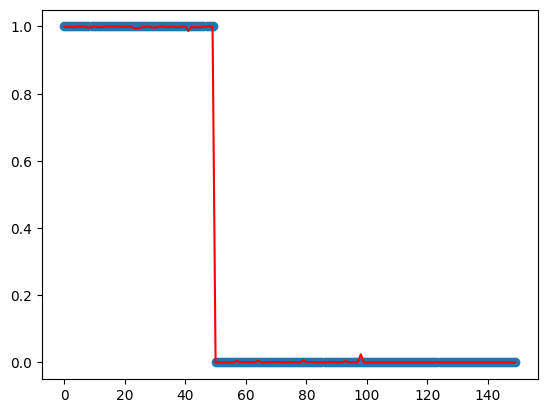

In [23]:
y = [f(w, b, x) for x in X[:]]
plt.plot(y, c="r")
plt.scatter(range(len(Y)), Y)
plt.show()